## Many with weight dynamics and complex coupling

Let's take the real coupling from before and add the baseline weight dynamics of the previous notebooks:

$$
\begin{eqnarray*}
    \dot{z_i} & = & z_i \left((\lambda + \mathrm{i}) + b |z_i|^2 \right) + \sum_k W_{ik} \mathrm{Re}(z_k) \\
    \dot{W} & = & \alpha \left( I_{N_z} - \mathrm{Re}(\mathbf{z})\mathrm{Re}(\mathbf{z})^\top \right)
\end{eqnarray*}
$$

In [2]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [86]:
Nz = 20

# Hopf oscillator characteristics
l = np.random.randn( Nz )
# TODO Should the Lyopunov exponent vary across oscillators?
b = -0.1 + np.random.randn( Nz ) * 1.j

alpha = 0.1 # 0.001 # 0.1

In [87]:
def deriv( t, y ):
    
    z = y[:Nz]
    W = np.reshape( y[Nz:], (Nz, Nz) )
    
    z_dot = np.zeros( z.shape[0], dtype = np.complex )
    
    for i in range( z_dot.shape[0] ):
        z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )
        
        for k in range( z_dot.shape[0] ):
#             if k == i:
#                 continue
#             z_dot[i] += W[i, k] * np.real( z[k] )
            z_dot[i] += W[i, k] * z[k]
    
#     W_dot = alpha * ( np.eye( Nz ) - np.outer( np.real( z ), np.real( z ) ) )
    W_dot = alpha * ( np.eye( Nz ) - np.outer( z, np.conj( z ) ) )
    
#     if t > 2000:
#         W_dot = np.zeros( W.shape, dtype = np.complex )
    
    y_dot = np.zeros( y.shape[0], dtype = np.complex )
    y_dot[:Nz] = z_dot
    y_dot[Nz:] = W_dot.flatten()
    
    return y_dot

In [88]:
t_span = [0, 2e4]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

In [89]:
# TODO Randomize the z0 in an intelligent way
z0 = np.zeros( (Nz,), dtype = np.complex )
for i in range( z0.shape[0] ):
    z0[i] = 0.01 + 0.j
    
W0 = np.random.randn( Nz, Nz ) + np.random.randn( Nz, Nz ) * 1.j

In [90]:
y0 = np.zeros( (Nz + Nz*Nz,), dtype = np.complex )
y0[:Nz] = z0
y0[Nz:] = W0.flatten()

In [91]:
sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval )

In [92]:
t_star = sol.t
y_star = sol.y

z_star = y_star[:Nz, :]
W_star = np.reshape( y_star[Nz:, :], (Nz, Nz, y_star.shape[1]) )

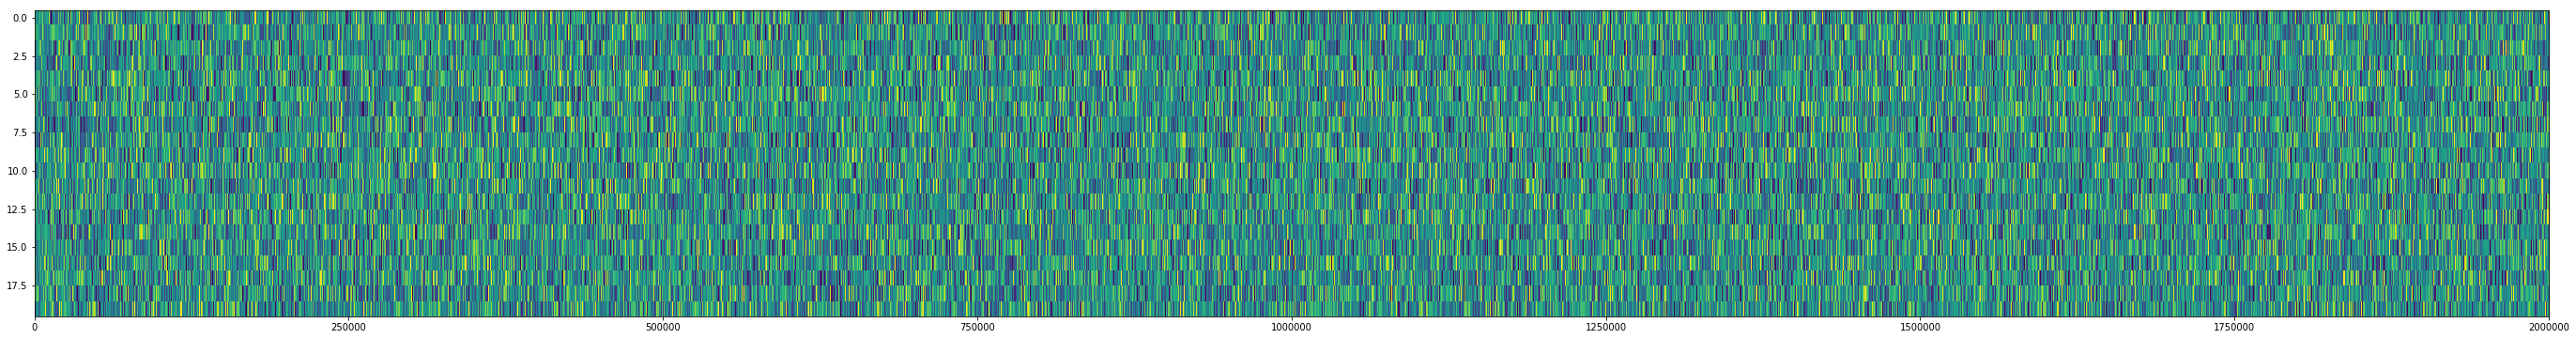

In [93]:
plt.figure( figsize = (48, 6) )
plt.imshow( np.real( z_star ), aspect = 'auto',
            vmin = np.quantile( np.real( z_star ), 0.01 ),
            vmax = np.quantile( np.real( z_star ), 0.99 ) )

In [101]:
W_star_eigvals = np.zeros( (W_star.shape[0], W_star.shape[2]), dtype = np.complex )
for i in range( W_star.shape[2] ):
    if i % 25000 == 0:
        print( 'i = {0}'.format( i ) )
    W_star_eigvals[:, i] = np.linalg.eigvals( W_star[:, :, i] )

i = 0
i = 25000
i = 50000
i = 75000
i = 100000
i = 125000
i = 150000
i = 175000
i = 200000
i = 225000
i = 250000
i = 275000
i = 300000
i = 325000
i = 350000
i = 375000
i = 400000
i = 425000
i = 450000
i = 475000
i = 500000
i = 525000
i = 550000
i = 575000
i = 600000
i = 625000
i = 650000
i = 675000
i = 700000
i = 725000
i = 750000
i = 775000
i = 800000
i = 825000
i = 850000
i = 875000
i = 900000
i = 925000
i = 950000
i = 975000
i = 1000000
i = 1025000
i = 1050000
i = 1075000
i = 1100000
i = 1125000
i = 1150000
i = 1175000
i = 1200000
i = 1225000
i = 1250000
i = 1275000
i = 1300000
i = 1325000
i = 1350000
i = 1375000
i = 1400000
i = 1425000
i = 1450000
i = 1475000
i = 1500000
i = 1525000
i = 1550000
i = 1575000
i = 1600000
i = 1625000
i = 1650000
i = 1675000
i = 1700000
i = 1725000
i = 1750000
i = 1775000
i = 1800000
i = 1825000
i = 1850000
i = 1875000
i = 1900000
i = 1925000
i = 1950000
i = 1975000


(1000, 1200)

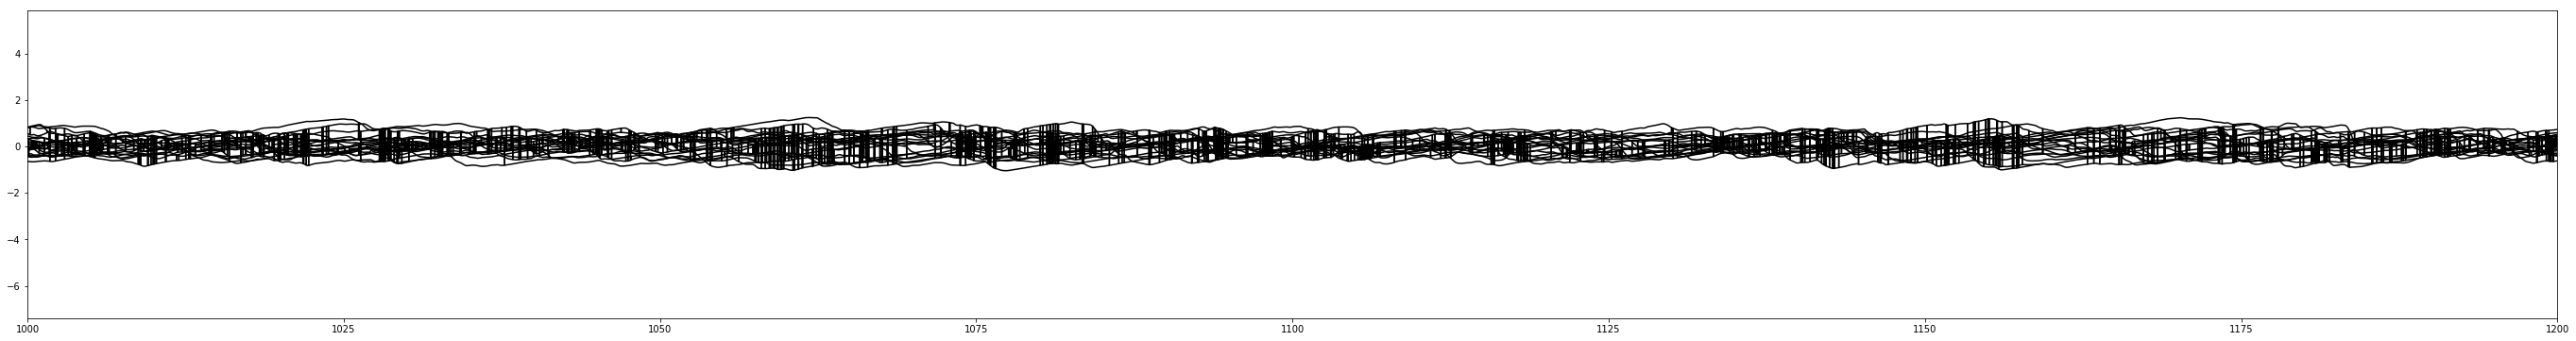

In [103]:
plt.figure( figsize = (48, 6) )
# plt.imshow( np.real( W_star_eigvals ), aspect = 'auto', cmap = 'Spectral_r' )
# plt.clim( -5, 5 )
# plt.colorbar()

plt.plot( t_star, np.real( W_star_eigvals ).T, 'k-' )

plt.xlim( 1000, 1200 )

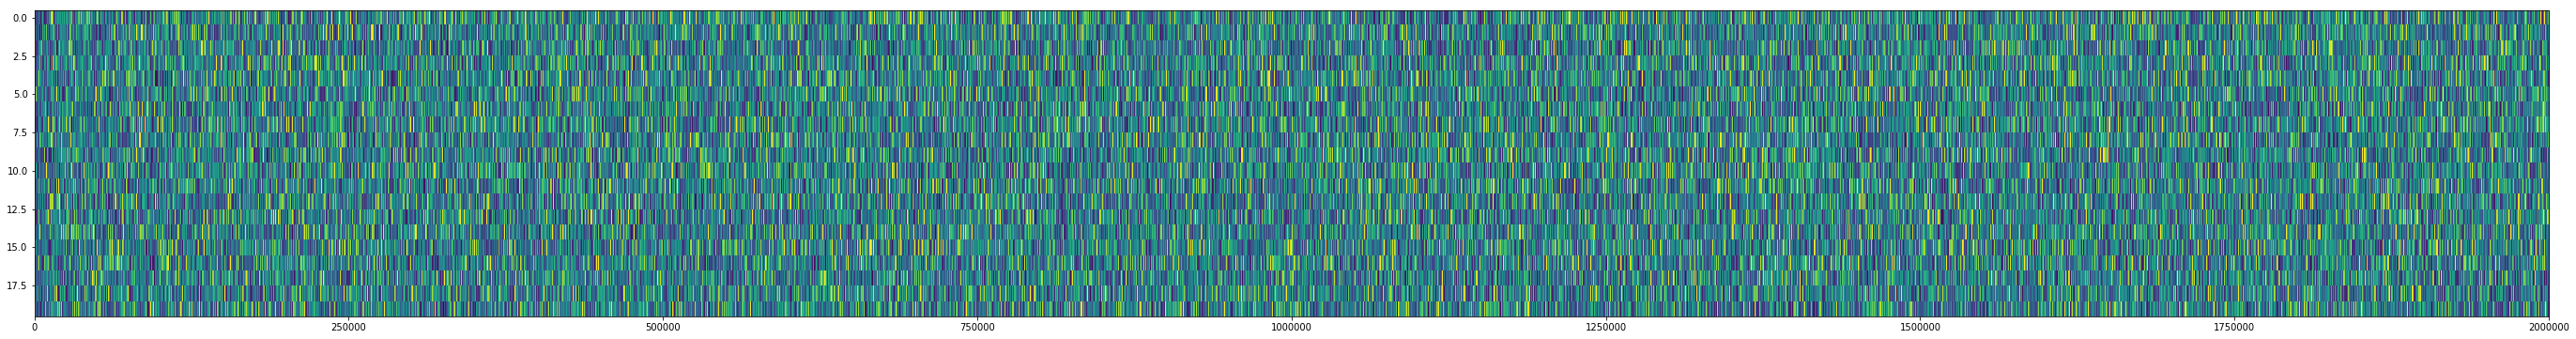

In [94]:
plt.figure( figsize = (48, 6) )
plt.imshow( np.abs( z_star ), aspect = 'auto' )
plt.clim( 0, 2 )

In [119]:
n_shuffle = 1000

z_sync = np.abs( np.sum( z_star, axis = 0 ) )
z_sync_shuffle = np.zeros( (n_shuffle, z_sync.shape[0]) )

for i_shuffle in range( n_shuffle ):
    
    if i_shuffle % 100 == 0:
        print( 'Shuffle #{0}'.format( i_shuffle ) )
    
    z_shuffle = np.zeros( z_star.shape, dtype = np.complex )
    for i_channel in range( z_shuffle.shape[0] ):
        z_cur = z_star[i_channel, :].copy()
        np.random.shuffle( z_cur )
        z_shuffle[i_channel, :] = z_cur
    z_sync_shuffle[i_shuffle, :] = np.abs( np.sum( z_star, axis = 0 ) )

Shuffle #0
Shuffle #100
Shuffle #200
Shuffle #300
Shuffle #400
Shuffle #500
Shuffle #600
Shuffle #700
Shuffle #800
Shuffle #900


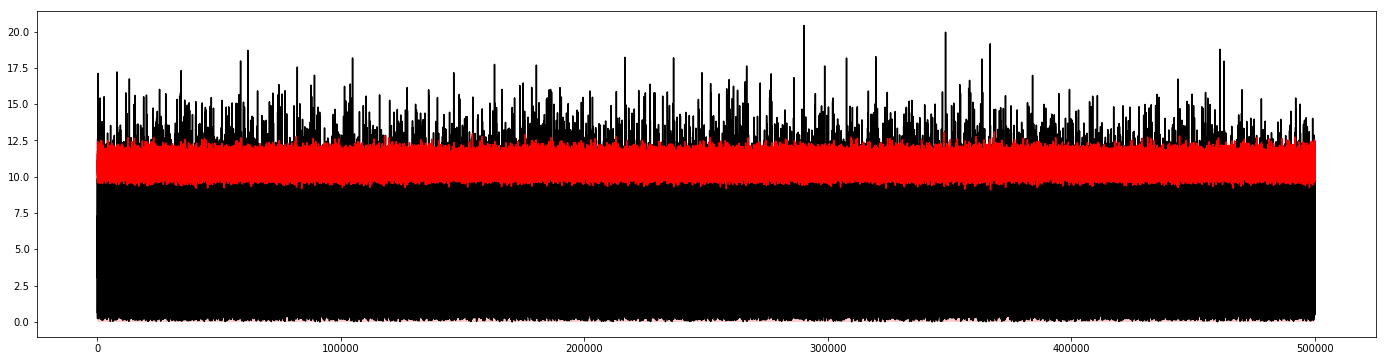

In [154]:
plt.figure( figsize = (24, 6) )

plt.plot( z_sync, 'k-' )
plt.plot( np.quantile( z_sync_shuffle, 0.99, axis = 0 ), 'r-' )
plt.fill_between( np.arange( z_sync_shuffle.shape[1] ), np.quantile( z_sync_shuffle, 0.99, axis = 0 ), facecolor = 'r', alpha = 0.2 )
# plt.xlim( 200000, 220000 )

In [136]:
np.sum( z_sync > np.quantile( z_sync_shuffle, 0.99, axis = 0 ) ) / z_sync.shape[0]

0.00996

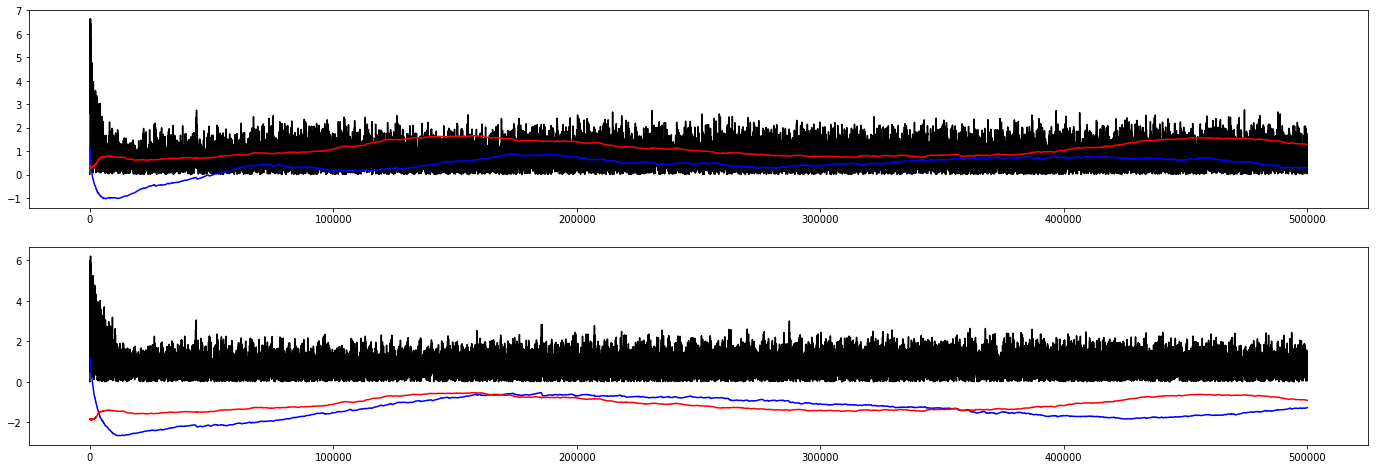

In [250]:
fig, axs = plt.subplots( 2, 1, figsize = (24, 8) )

axs[0].plot( np.abs( z_star[6, :] ), 'k-' )
axs[0].plot( np.real( W_star[6, 6, :] ), 'b-' )
axs[0].plot( np.real( W_star[6, 7, :] ), 'r-' )
# axs[0].set_xlim( 200000, 300000 )
# axs[0].set_ylim( 0.5, 0.75 )

axs[1].plot( np.abs( z_star[7, :] ), 'k-' )
axs[1].plot( np.real( W_star[7, 7, :] ), 'b-' )
axs[1].plot( np.real( W_star[7, 6, :] ), 'r-' )
# axs[1].set_xlim( 200000, 300000 )
# axs[1].set_ylim( 0.75, 1.0 )

plt.show()

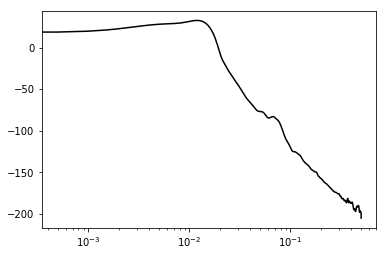

In [95]:
import scipy.signal

f, Pxx = scipy.signal.welch( np.real( z_star[1, :] ), nfft = 2048 )
plt.semilogx( f, 20 * np.log10( Pxx ), 'k-' )

In [96]:
f, Pxx = scipy.signal.welch( np.real( z_star ), nfft = 2048, axis = 1 )

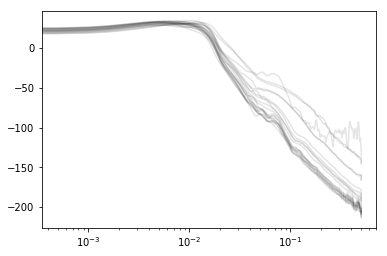

In [97]:
plt.semilogx( f, 20 * np.log10( Pxx.T ), 'k-', alpha = 0.1 )
plt.show()

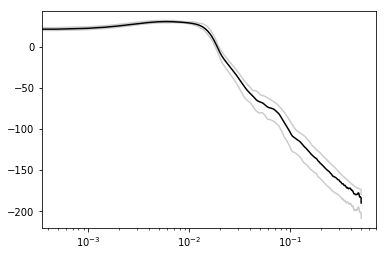

In [98]:
plt.semilogx( f, 20 * np.mean( np.log10( Pxx ), axis = 0 ), 'k-' )
plt.semilogx( f, 20 * np.quantile( np.log10( Pxx ), 0.25, axis = 0 ), 'k-', alpha = 0.2 )
plt.semilogx( f, 20 * np.quantile( np.log10( Pxx ), 0.75, axis = 0 ), 'k-', alpha = 0.2 )

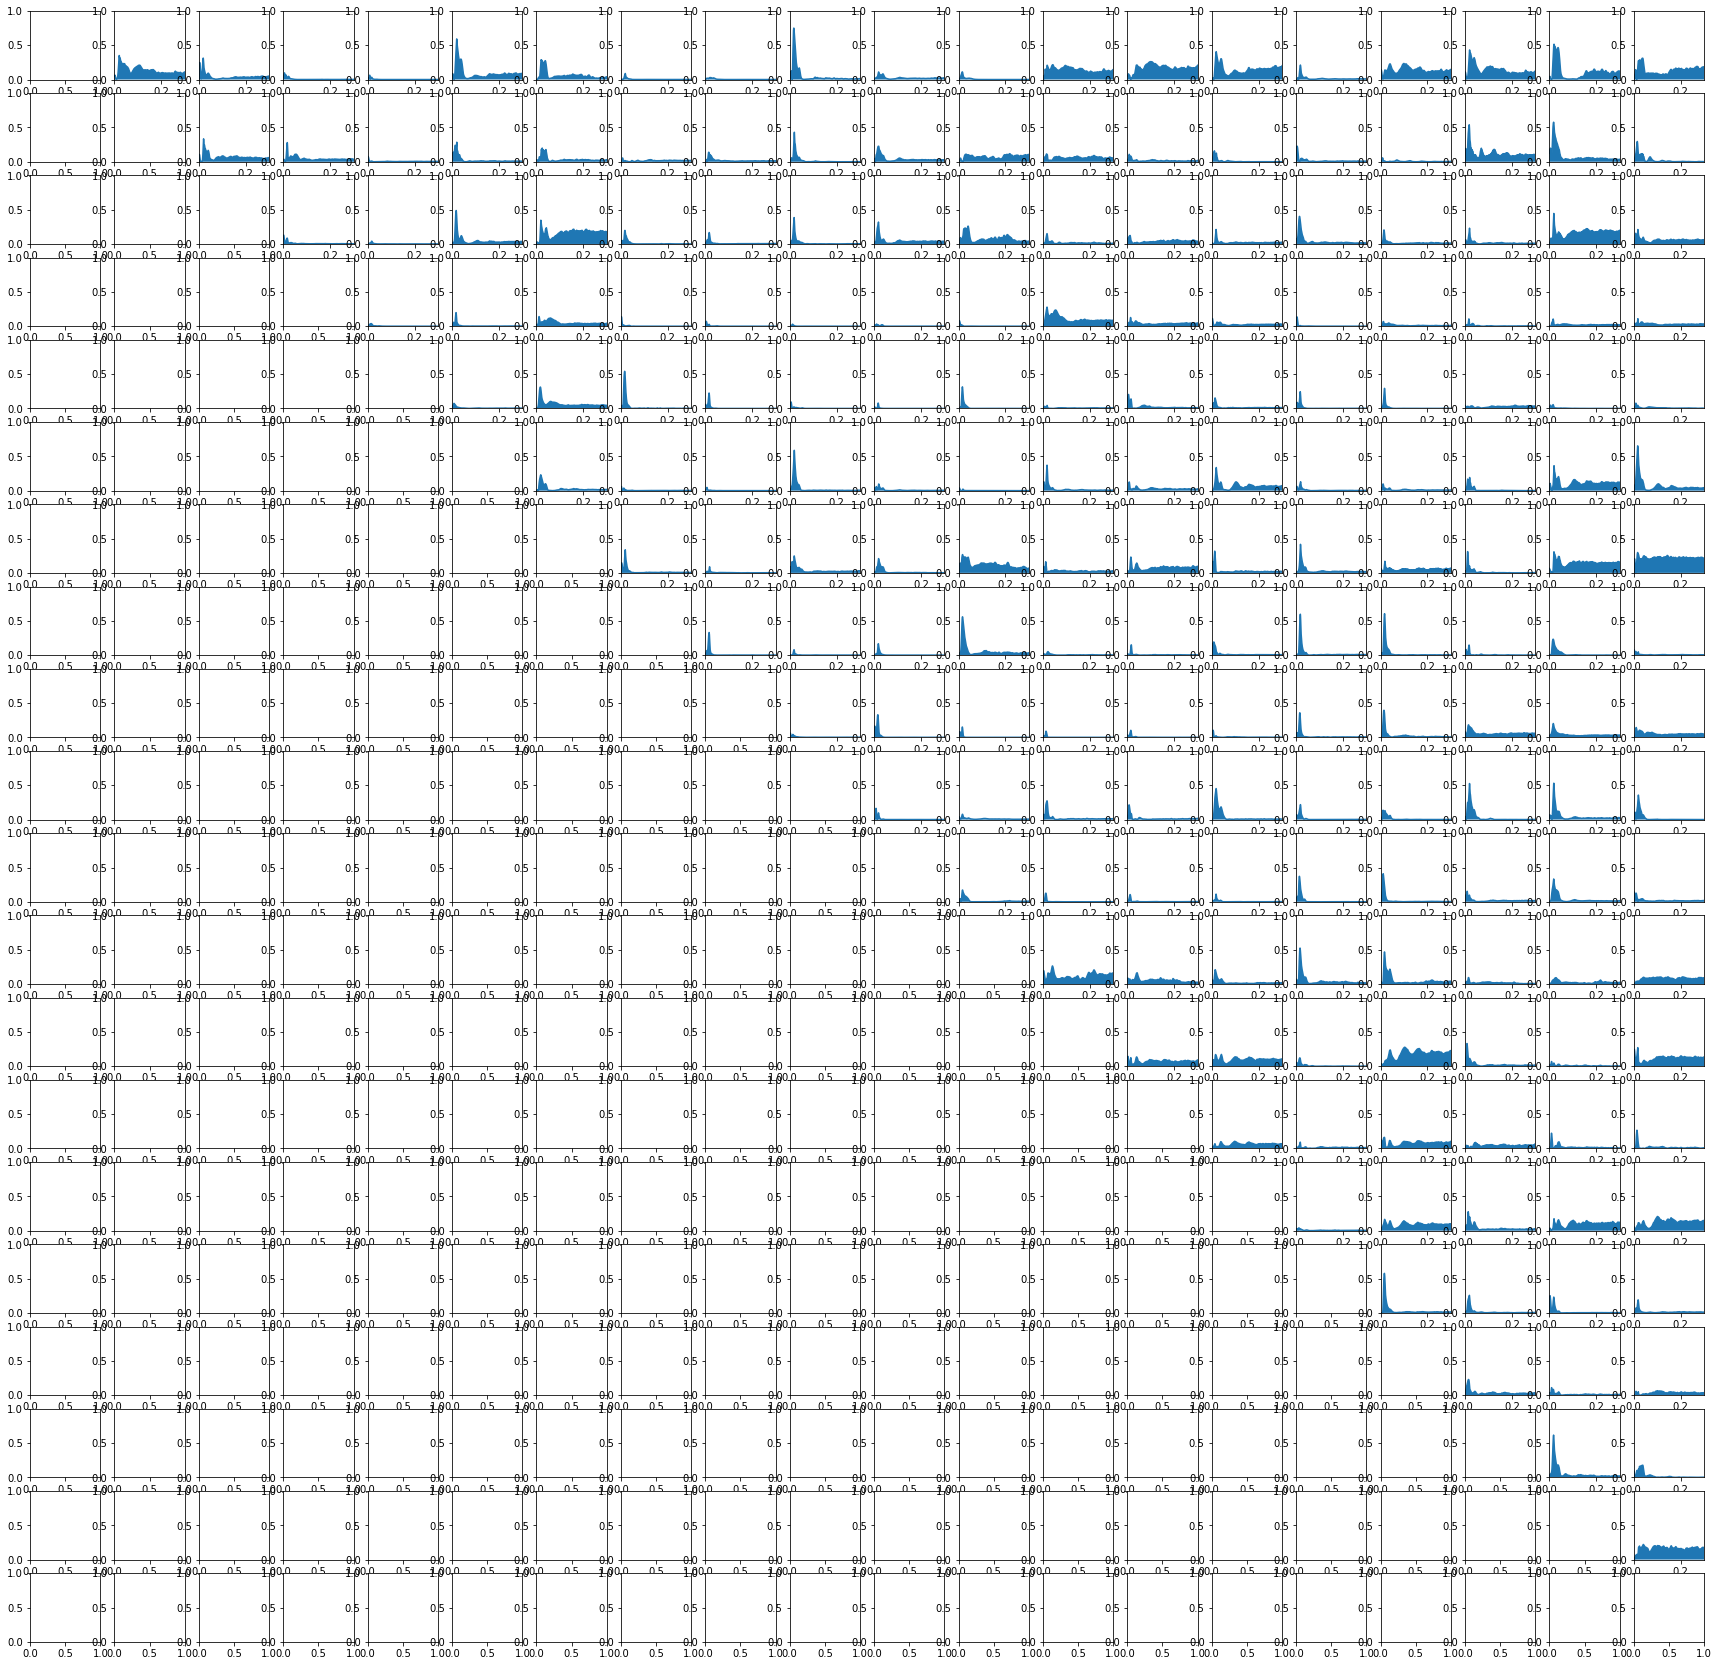

In [99]:
fig, axs = plt.subplots( Nz, Nz, figsize = (30, 30) )

for i in range( Nz ):
    for j in range( i+1, Nz ):
        f, Cxy = scipy.signal.coherence( np.real( z_star[i, 5000:] ), np.real( z_star[j, 5000:] ),
                                         nfft = 2048)
        axs[i, j].plot( f, Cxy )
        axs[i, j].fill_between( f, Cxy )
        axs[i, j].set_ylim( 0, 1 )
        axs[i, j].set_xlim( 0, 0.3 )

plt.show()

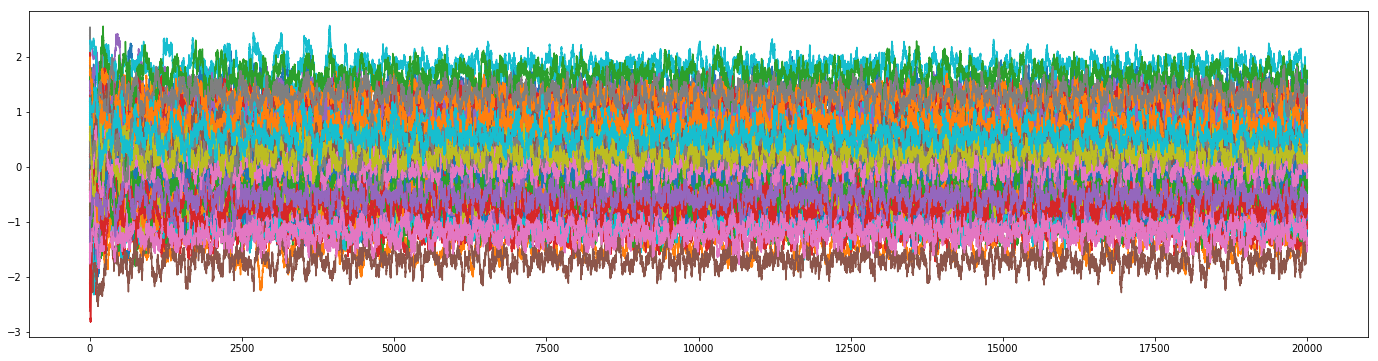

In [100]:
plt.figure( figsize = (24, 6) )
plt.plot( t_star, np.real( y_star[Nz:(Nz+100), :].T ) )
plt.show()

In [25]:
coherence_window = 512
coherence_window_step = 128
coherence_nfft = 512
coherence_f_min = 0.0
coherence_f_max = 0.1

coherence_starts = np.arange( 0, z_star.shape[1] - coherence_window, coherence_window_step )

i = 1
j = 5

coherence_trace = np.zeros( (coherence_starts.shape[0],) )

n_shuffle = 100
coherence_trace_shuffle = np.zeros( (n_shuffle, coherence_trace.shape[0]) )

for i_start, cur_start in enumerate( coherence_starts ):
    cur_end = cur_start + coherence_window
    cur_data_i = np.real( z_star[i, cur_start:cur_end] )
    cur_data_j = np.real( z_star[j, cur_start:cur_end] )
    
    f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
    coherence_trace[i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )
    
    for i_shuffle in range( n_shuffle ):
        np.random.shuffle( cur_data_i )
        np.random.shuffle( cur_data_j )
        
        f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
        coherence_trace_shuffle[i_shuffle, i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )
        

In [26]:
coherence_centers = coherence_starts + coherence_window / 2

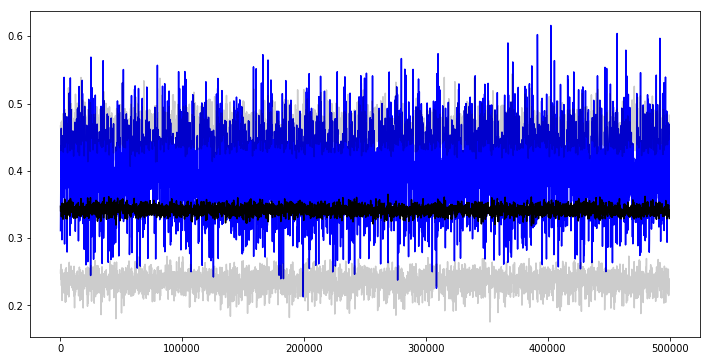

In [27]:
plt.figure( figsize = (12, 6) )

plt.plot( coherence_centers, coherence_trace, 'b-' )

plt.plot( coherence_centers, np.median( coherence_trace_shuffle, axis = 0 ), 'k-' )
plt.plot( coherence_centers, np.quantile( coherence_trace_shuffle, 0.01, axis = 0 ), 'k-', alpha = 0.2 )
plt.plot( coherence_centers, np.quantile( coherence_trace_shuffle, 0.99, axis = 0 ), 'k-', alpha = 0.2 )

# plt.xlim( 40000, 100000 )

plt.show()

In [104]:
coherence_window = 512
coherence_window_step = 128
coherence_nfft = 512
coherence_f_min = 0.0
coherence_f_max = 0.1

coherence_starts = np.arange( 0, z_star.shape[1] - coherence_window, coherence_window_step )

coherence_traces = np.zeros( (Nz, Nz, coherence_starts.shape[0],) )

# n_shuffle = 100
# coherence_trace_shuffle = np.zeros( (n_shuffle, coherence_trace.shape[0]) )

for i in range( Nz ):
    print( 'Starting row {0}'.format( i ) )
    for j in range( Nz ):
        for i_start, cur_start in enumerate( coherence_starts ):
            cur_end = cur_start + coherence_window
            cur_data_i = np.real( z_star[i, cur_start:cur_end] )
            cur_data_j = np.real( z_star[j, cur_start:cur_end] )

            f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
            coherence_traces[i, j, i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )

        #     for i_shuffle in range( n_shuffle ):
        #         np.random.shuffle( cur_data_i )
        #         np.random.shuffle( cur_data_j )

        #         f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
        #         coherence_trace_shuffle[i_shuffle, i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )
        
print( 'Done.' )

Starting row 0
Starting row 1
Starting row 2
Starting row 3
Starting row 4
Starting row 5
Starting row 6
Starting row 7
Starting row 8
Starting row 9
Starting row 10
Starting row 11
Starting row 12
Starting row 13
Starting row 14
Starting row 15
Starting row 16
Starting row 17
Starting row 18
Starting row 19
Done.


In [105]:
coherence_centers = coherence_starts + coherence_window / 2

In [106]:
from sklearn.decomposition import PCA, NMF

In [107]:
coherence_traces_list = []
coherence_pair_list = []
for i in range( Nz ):
    for j in range( i+1, Nz ):
        coherence_traces_list.append( coherence_traces[i, j, :] )
        coherence_pair_list.append( (i, j) )

coherence_traces_linear = np.zeros( (len( coherence_traces_list ), coherence_traces_list[0].shape[0]) )
for i, trace in enumerate( coherence_traces_list ):
    coherence_traces_linear[i, :] = trace

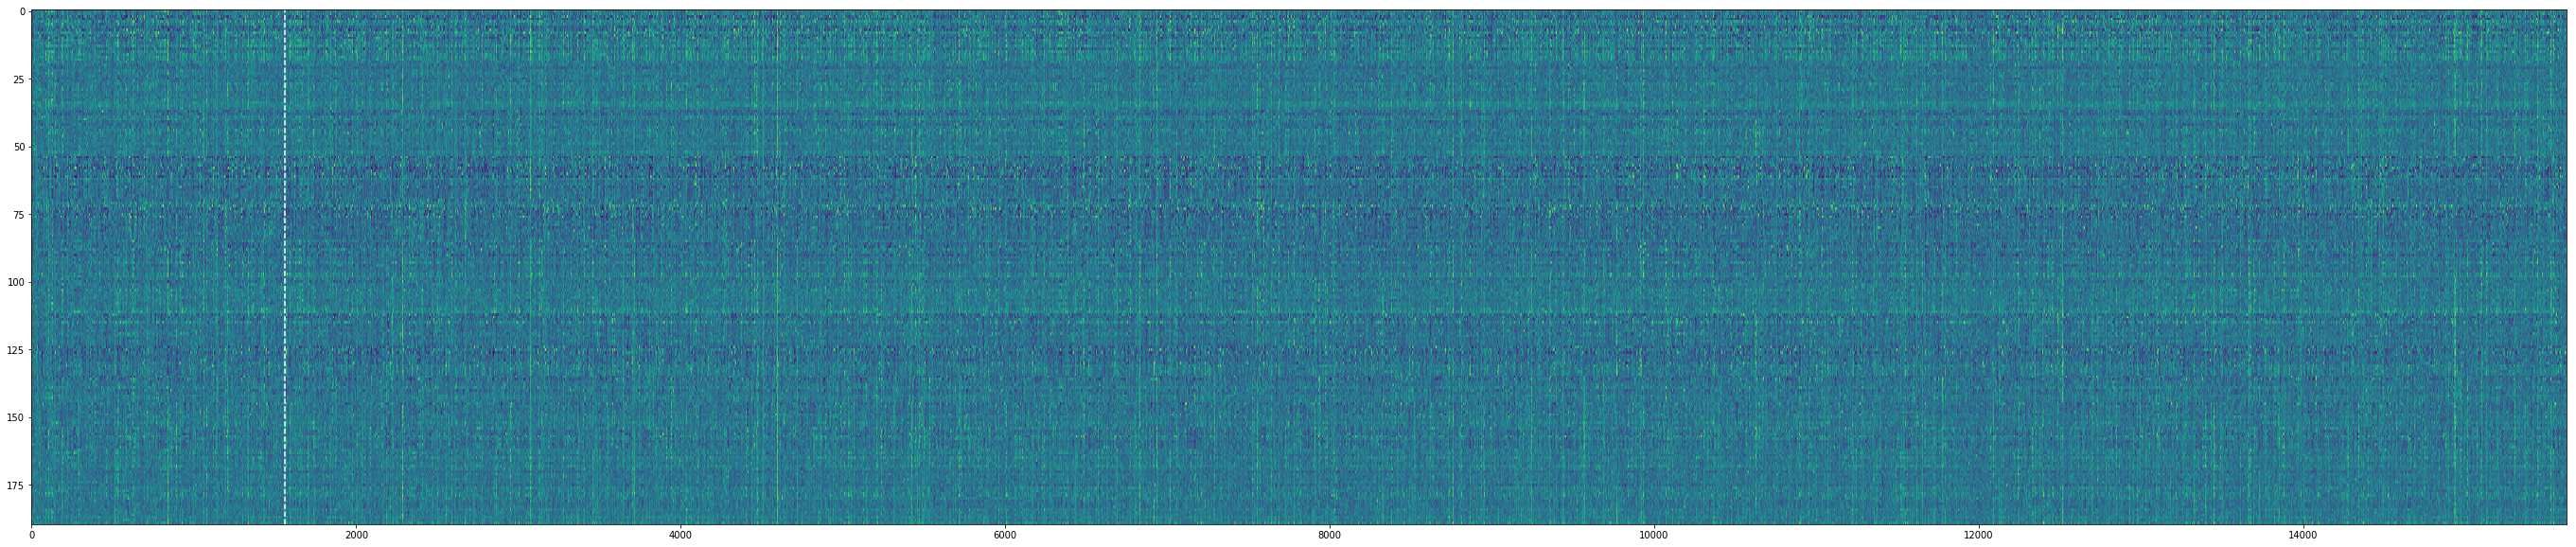

In [108]:
i_coherence_trunc = np.where( (coherence_centers / 1e2) >= 2000 )[0][0]

plt.figure( figsize = (48, 10) )
plt.imshow( coherence_traces_linear, aspect = 'auto' )
yl = plt.ylim()
plt.plot( i_coherence_trunc * np.array( [1, 1] ), yl, 'w--' )
plt.ylim( yl )
plt.clim( 0, 1 )

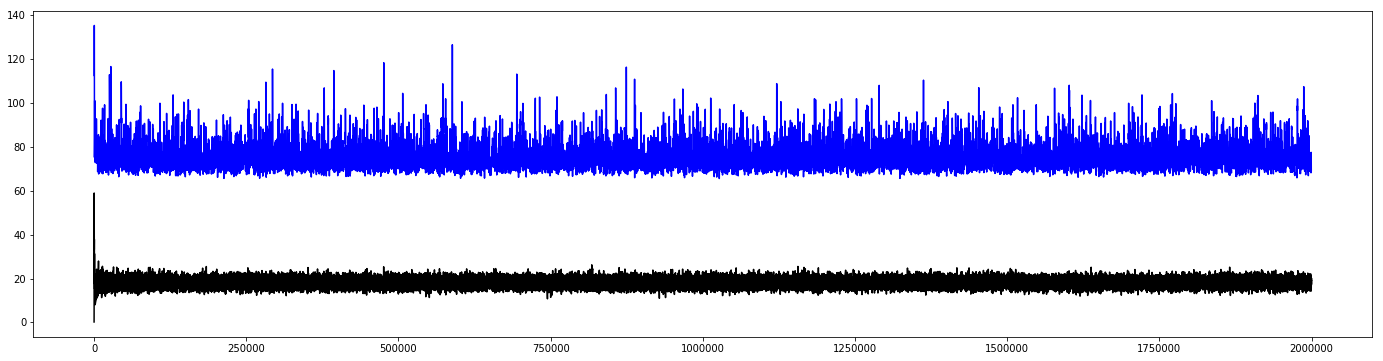

In [110]:
plt.figure( figsize = (24, 6) )
plt.plot( np.sum( np.abs( z_star ), axis = 0 ), 'k-' )
plt.plot( coherence_centers, np.sum( coherence_traces_linear, axis = 0 ), 'b-' )

In [263]:
z_abs_window = np.zeros( coherence_centers.shape[0] )
for i_start, cur_start in enumerate( coherence_starts ):
    cur_end = cur_start + coherence_window
    z_abs_window[i_start] = np.mean( np.sum( np.abs( z_star[:, cur_start:cur_end] ), axis = 0 ), axis = 0 )

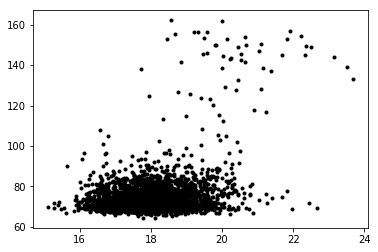

In [264]:
corr_start = 1000
x = z_abs_window[corr_start:]
y = np.sum( coherence_traces_linear, axis = 0 )[corr_start:]

plt.plot( x, y, 'k.' )

In [265]:
import scipy.stats

In [266]:
scipy.stats.spearmanr( x, y )

SpearmanrResult(correlation=0.12577749831933152, pvalue=1.0394367817573468e-11)

In [44]:
z_shuffle = np.zeros( z_star.shape, dtype = np.complex )
for i_channel in range( z_shuffle.shape[0] ):
    z_cur = z_star[i_channel, :].copy()
    np.random.shuffle( z_cur )
    z_shuffle[i_channel, :] = z_cur

# coherence_window = 512
# coherence_window_step = 128
# coherence_nfft = 512
# coherence_f_min = 0.1
# coherence_f_max = 0.2

coherence_starts_shuffle = np.arange( 0, z_shuffle.shape[1] - coherence_window, coherence_window_step )

coherence_traces_shuffle = np.zeros( (Nz, Nz, coherence_starts_shuffle.shape[0],) )

for i in range( Nz ):
    print( 'Starting row {0}'.format( i ) )
    for j in range( Nz ):
        for i_start, cur_start in enumerate( coherence_starts ):
            cur_end = cur_start + coherence_window
            cur_data_i = np.real( z_shuffle[i, cur_start:cur_end] )
            cur_data_j = np.real( z_shuffle[j, cur_start:cur_end] )

            f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
            coherence_traces_shuffle[i, j, i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )

        #     for i_shuffle in range( n_shuffle ):
        #         np.random.shuffle( cur_data_i )
        #         np.random.shuffle( cur_data_j )

        #         f, Cxy = scipy.signal.coherence( cur_data_i, cur_data_j, nfft = coherence_nfft )
        #         coherence_trace_shuffle[i_shuffle, i_start] = np.mean( Cxy[(f >= coherence_f_min) & (f < coherence_f_max)] )
        
print( 'Done.' )

Starting row 0
Starting row 1
Starting row 2
Starting row 3
Starting row 4
Starting row 5
Starting row 6
Starting row 7
Starting row 8
Starting row 9
Starting row 10
Starting row 11
Starting row 12
Starting row 13
Starting row 14
Starting row 15
Starting row 16
Starting row 17
Starting row 18
Starting row 19
Done.


In [45]:
coherence_centers_shuffle = coherence_starts_shuffle + coherence_window / 2

In [46]:
coherence_traces_list_shuffle = []
for i in range( Nz ):
    for j in range( i+1, Nz ):
        coherence_traces_list_shuffle.append( coherence_traces_shuffle[i, j, :] )

coherence_traces_linear_shuffle = np.zeros( (len( coherence_traces_list_shuffle ), coherence_traces_list_shuffle[0].shape[0]) )
for i, trace in enumerate( coherence_traces_list_shuffle ):
    coherence_traces_linear_shuffle[i, :] = trace

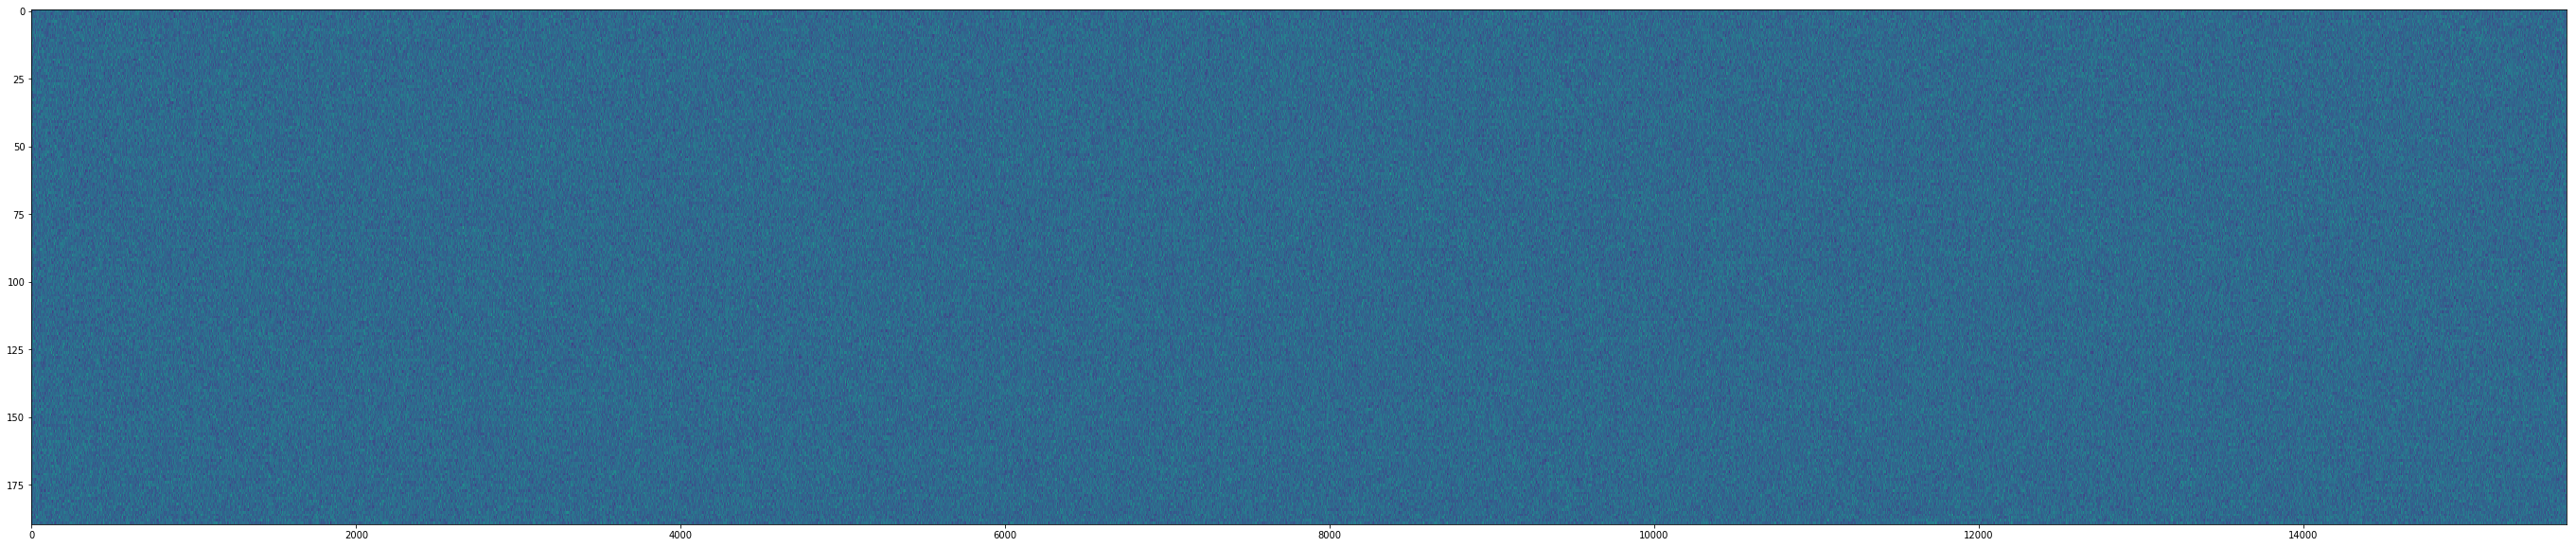

In [47]:
plt.figure( figsize = (48, 10) )
plt.imshow( coherence_traces_linear_shuffle, aspect = 'auto' )
plt.clim( 0, 1 )

In [111]:
channel_pairs = {i: [] for i in range( Nz )}
for i in range( Nz ):
    for i_pair, pair in enumerate( coherence_pair_list ):
        if i in pair:
            channel_pairs[i].append( i_pair )

In [112]:
channel_pairs[4]

[3, 21, 38, 54, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

In [113]:
coherence_pair_list[74]

(4, 9)

(300000, 400000)

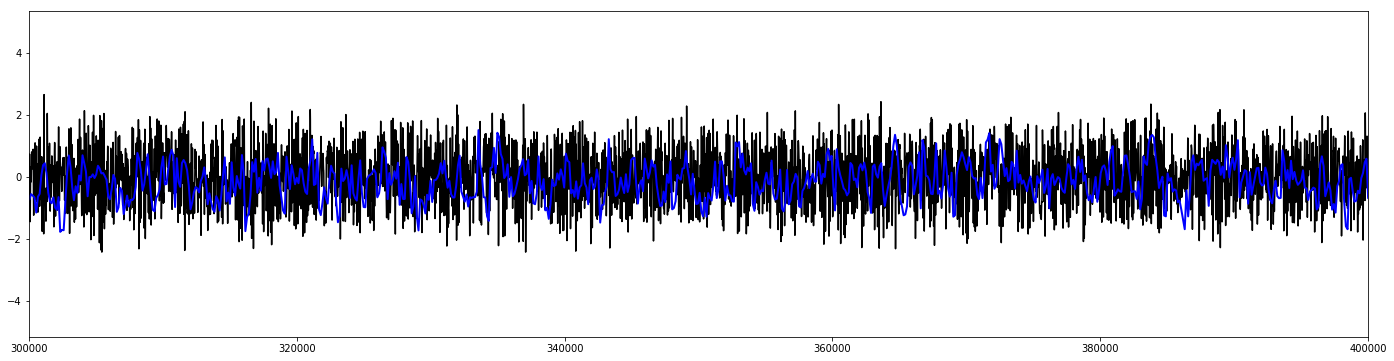

In [215]:
plt.figure( figsize = (24, 6) )
plt.plot( np.real( z_star[9, :] ), 'k-' )
plt.plot( coherence_centers, 5 * coherence_traces_linear[74, :] - 2.5, 'b-', linewidth = 2 )
plt.xlim( 300000, 400000 )

In [30]:
1. / ( 28 / (100000 * 1e-2) )

35.714285714285715

In [114]:
coherence_pca = PCA( n_components = 5 )
coherence_pca.fit( coherence_traces_linear.T )

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 5 artists>

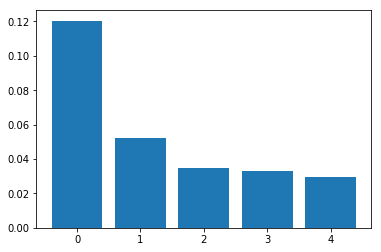

In [115]:
plt.bar( np.arange( 5 ), coherence_pca.explained_variance_ratio_ )

In [116]:
np.sum( coherence_pca.explained_variance_ratio_ )

0.26975739297208684

In [117]:
coherence_traces_pcs = coherence_pca.transform( coherence_traces_linear.T )

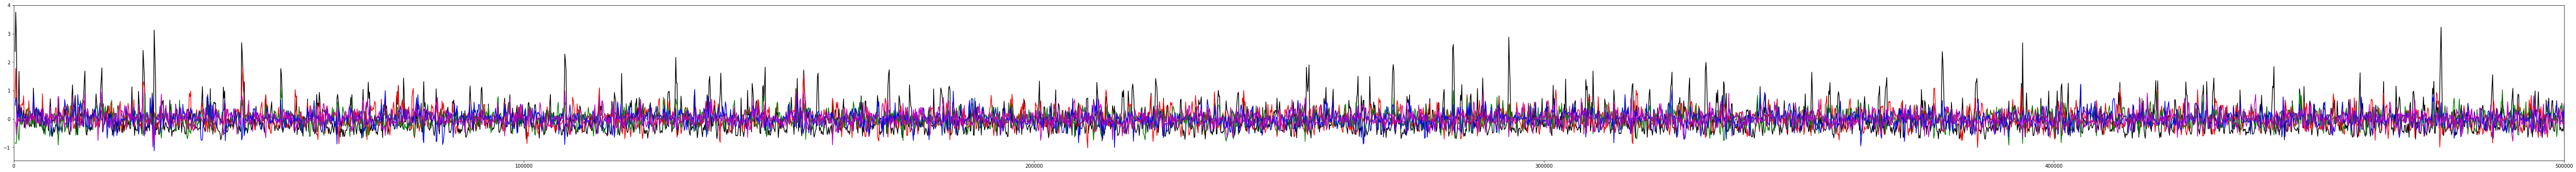

In [118]:
plt.figure( figsize = (96, 6) )

plt.plot( coherence_centers, coherence_traces_pcs[:, 0], 'k-' )
plt.plot( coherence_centers, coherence_traces_pcs[:, 1], 'r-' )
plt.plot( coherence_centers, coherence_traces_pcs[:, 2], 'g-' )
plt.plot( coherence_centers, coherence_traces_pcs[:, 3], 'b-' )
plt.plot( coherence_centers, coherence_traces_pcs[:, 4], 'm-' )

# plt.ylim( -0.5, 0.5 )
plt.xlim( 0, 500000 )
plt.show()

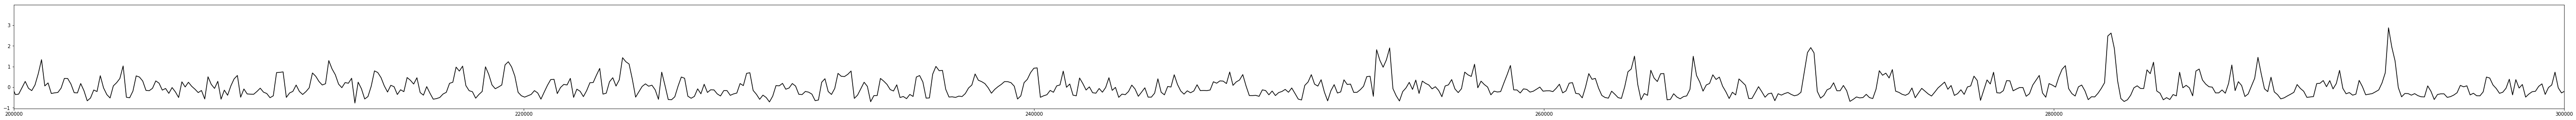

In [119]:
plt.figure( figsize = (96, 4) )

plt.plot( coherence_centers, coherence_traces_pcs[:, 0], 'k-' )

# plt.ylim( -0.5, 0.5 )
plt.xlim( 200000, 300000 )
plt.show()

In [122]:
i_component = 1
component_weights_square = np.zeros( (Nz, Nz) )
for i_entry in range( coherence_traces_linear.shape[0] ):
    i_cur, j_cur = coherence_pair_list[i_entry]
    component_weights_square[i_cur, j_cur] = coherence_pca.components_[i_component, i_entry]

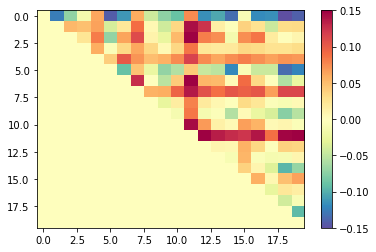

In [123]:
plt.imshow( component_weights_square, aspect = 'auto', cmap = 'Spectral_r' )
plt.clim( -0.15, 0.15 )
plt.colorbar()
plt.show()

(300000, 350000)

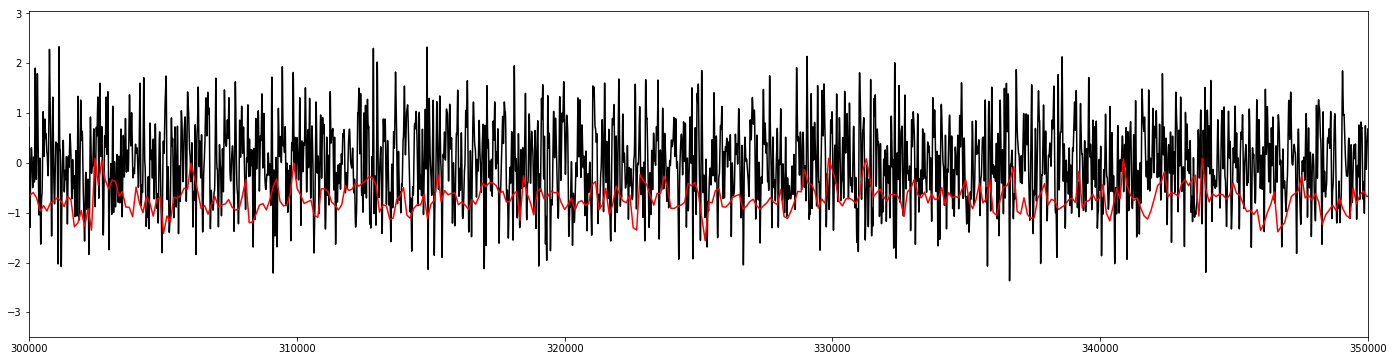

In [46]:
plt.figure( figsize = (24, 6) )
i_self = 0
plt.plot( np.real( z_star[i_self, :] ), 'k-' )
# plt.plot( np.real( W_star[i_self, i_self, :] ), 'b-' )
self_coherences = np.r_[ coherence_traces[i_self, :, :][np.arange( Nz ) > i_self, :],
                         coherence_traces[:, i_self, :][np.arange( Nz ) < i_self, :] ]
plt.plot( coherence_centers, 6 * np.mean( self_coherences, axis = 0 ) - 3, 'r-' )
plt.xlim( 300000, 350000 )
# plt.ylim( -2.5, -4 )

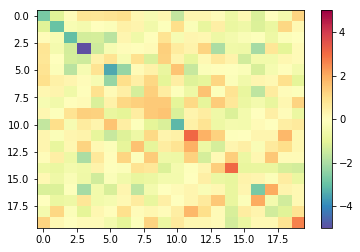

In [226]:
plt.imshow( np.real( W_star[:, :, 60000] + W_star[:, :, 60000].T ), aspect = 'auto', cmap = 'Spectral_r' )
plt.clim( -5, 5 )
plt.colorbar()
plt.show()

In [124]:
coherence_nmf = NMF( n_components = 10 )
coherence_nmf.fit( coherence_traces_linear.T )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [125]:
coherence_traces_nmfs = coherence_nmf.transform( coherence_traces_linear.T )

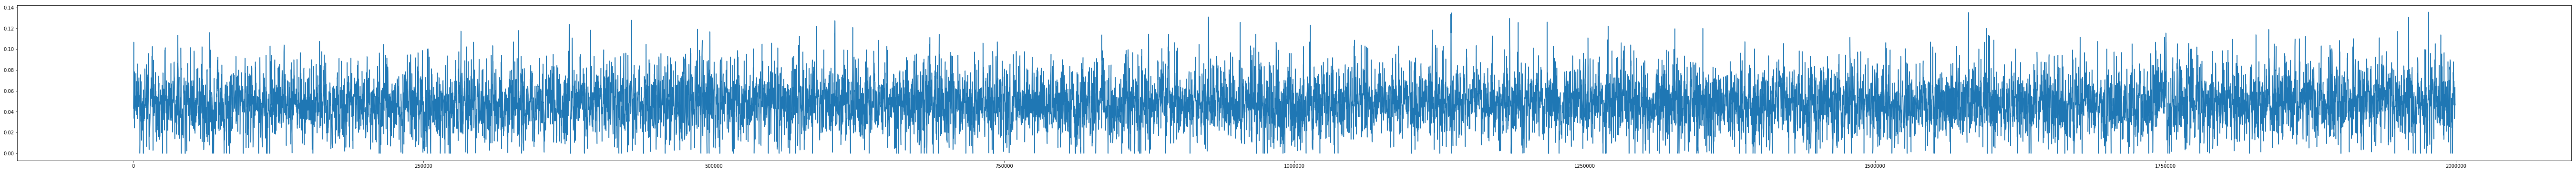

In [143]:
plt.figure( figsize = (96, 6) )

# plt.plot( coherence_centers, coherence_traces_nmfs[:, 0], 'k-' )
# plt.plot( coherence_centers, coherence_traces_nmfs[:, 1], 'r-' )
# plt.plot( coherence_centers, coherence_traces_nmfs[:, 2], 'g-' )
# plt.plot( coherence_centers, coherence_traces_nmfs[:, 3], 'b-' )
# plt.plot( coherence_centers, coherence_traces_nmfs[:, 4], 'm-' )

plt.plot( coherence_centers, coherence_traces_nmfs[:, 4] )

# plt.ylim( -0.5, 0.5 )
# plt.xlim( 100000, 200000 )
plt.show()

In [141]:
i_component = 4
component_weights_square = np.zeros( (Nz, Nz) )
for i_entry in range( coherence_traces_linear.shape[0] ):
    i_cur, j_cur = coherence_pair_list[i_entry]
    component_weights_square[i_cur, j_cur] = coherence_nmf.components_[i_component, i_entry]

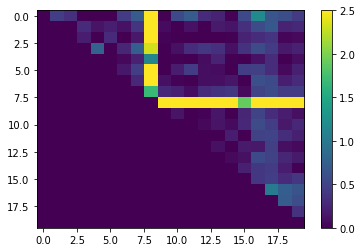

In [142]:
plt.imshow( component_weights_square, aspect = 'auto' )
plt.clim( 0, 2.5 )
plt.colorbar()
plt.show()

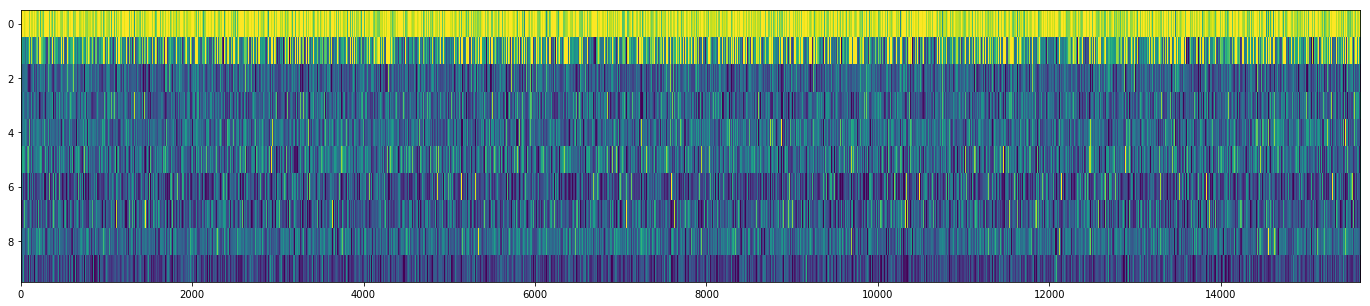

In [144]:
plt.figure( figsize = (24, 5) )
plt.imshow( coherence_traces_nmfs.T, aspect = 'auto',
            vmin = 0,
            vmax = np.quantile( coherence_traces_nmfs, 0.95 ) )
plt.show()

In [145]:
def entropy( p ):
    ret = 0.
    for i, p_i in enumerate( p ):
        if p_i == 0:
            continue
        ret -= p_i * np.log2( p_i )
    return ret

In [146]:
coherence_entropy = np.zeros( (coherence_traces_nmfs.shape[0],) )
for i in range( coherence_entropy.shape[0] ):
    p_cur = coherence_traces_nmfs[i, :] / np.sum( coherence_traces_nmfs[i, :] )
    coherence_entropy[i] = entropy( p_cur )

(300000, 350000)

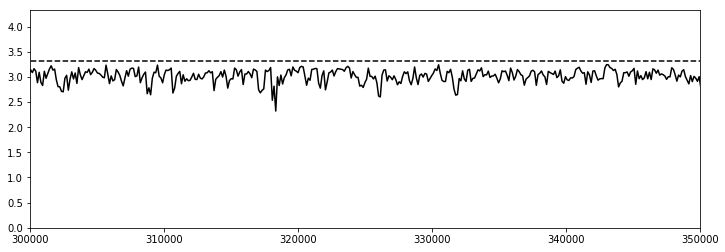

In [147]:
plt.figure( figsize = (12, 4) )
plt.plot( coherence_centers, coherence_entropy, 'k-' )
plt.plot( np.array( [0, 500000] ), np.log2( coherence_traces_nmfs.shape[1] ) * np.array( [1, 1] ), 'k--' )
plt.ylim( 0, np.log2( coherence_traces_nmfs.shape[1] ) + 1 )
plt.xlim( 300000, 350000 )


### Burst coding?

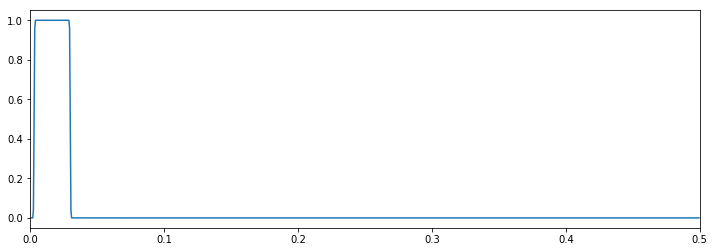

In [54]:
# Design our filters
passband_ripple = 0.005
passband_ripple_db = -20 * np.log10( passband_ripple )
stopband_attenuation = 65
stopband_attenuation_db = stopband_attenuation
kaiser_design_param = np.maximum( passband_ripple_db, stopband_attenuation_db )

width_low = 0.0015
numtaps_low, beta_low = scipy.signal.kaiserord( kaiser_design_param, width_low / 0.5 )

cutoff_low = np.array( [0.003, 0.03] )
taps_low = scipy.signal.firwin( numtaps_low, cutoff_low, # np.array( [cutoff_low] ),
                                window = ('kaiser', beta_low),
                                scale = False,
                                pass_zero = False,
                                nyq = 0.5 )

n_taps_low = taps_low.shape[0]

# Show the filters
if True:
    w_low, h_low = scipy.signal.freqz( taps_low, worN = 1000 )

    w_low *= (0.5 / np.pi)

    plt.figure( figsize = (12, 4) )
#     plt.plot( w_low, (w_low <= cutoff_low), 'k-' )
    plt.plot( w_low, np.abs( h_low ) )
    plt.xlim( 0, 0.5 )

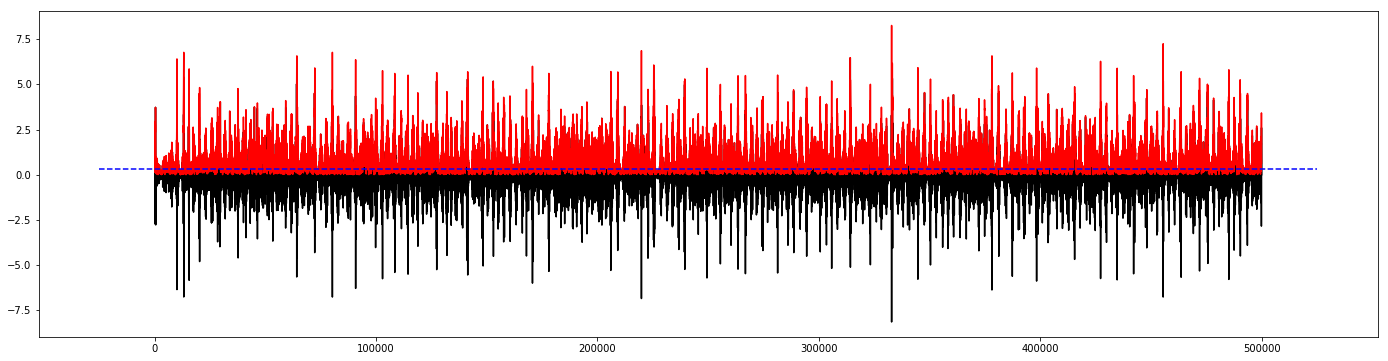

In [191]:
plt.figure( figsize = (24, 6) )
i_self = 11
cur_channel = np.real( z_star[i_self, :] )
cur_channel_filt = scipy.signal.filtfilt( taps_low, 1., cur_channel )
cur_channel_env = np.abs( scipy.signal.hilbert( cur_channel_filt ) )
# cur_channel_env_smooth = scipy.signal.filtfilt( taps_low, 1., cur_channel_env )

plt.plot( cur_channel_filt, 'k-' )
plt.plot( cur_channel_env, 'r-' )

# plt.xlim( 200000, 250000 )

quiet_thresh = 0.3
plt.plot( plt.xlim(), quiet_thresh * np.array( [1., 1.] ), 'b--' )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


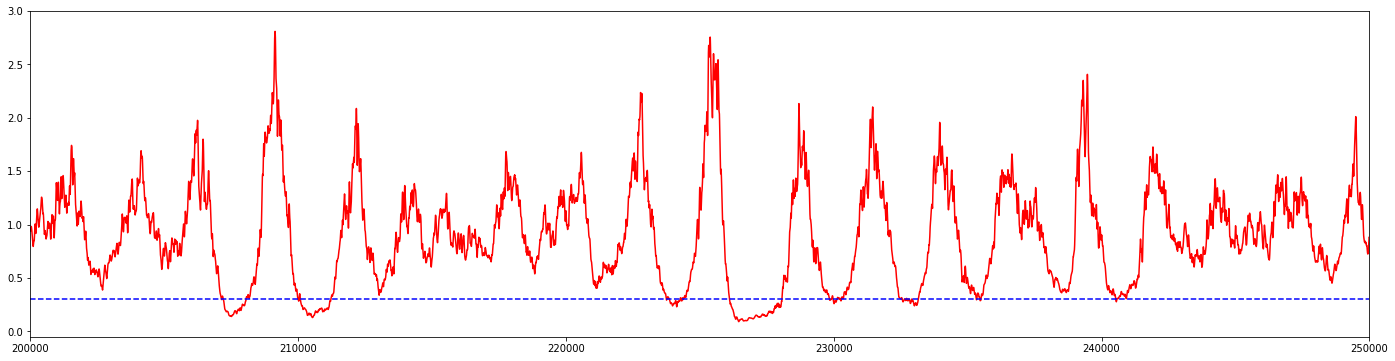

In [140]:
cur_channels = np.real( z_star )
cur_channels_filt = scipy.signal.filtfilt( taps_low, 1., cur_channels, axis = 1 )
cur_channels_env = np.abs( scipy.signal.hilbert( cur_channels_filt, axis = 1 ) )

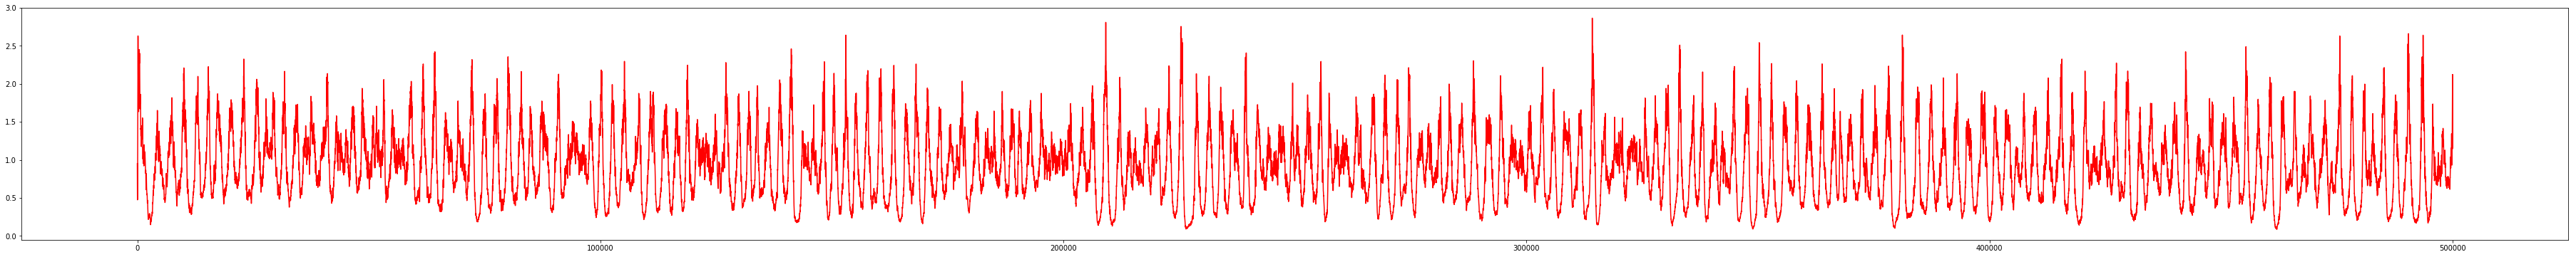

In [145]:
plt.figure( figsize = (64, 6) )
# plt.plot( cur_channels_filt, 'k-' )
plt.plot( np.mean( cur_channels_env, axis = 0 ), 'r-' )
# plt.xlim( 100000, 150000 )

# quiet_thresh = 0.3
# plt.plot( plt.xlim(), quiet_thresh * np.array( [1., 1.] ), 'b--' )

In [170]:
mean_env = np.mean( cur_channels_env, axis = 0 )
env_peaks, tmp = scipy.signal.find_peaks( mean_env, threshold = 0.0001, distance = 2000 )

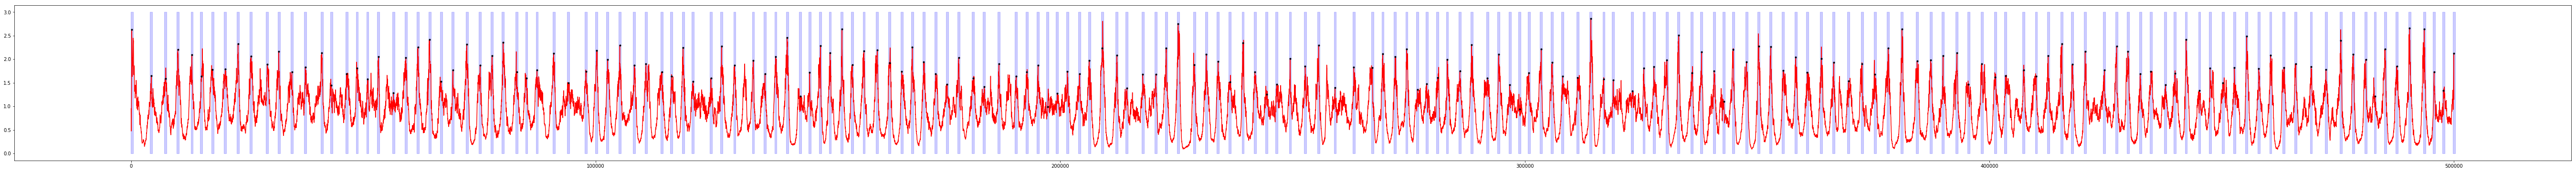

In [177]:
plt.figure( figsize = (96, 6) )
plt.plot( mean_env, 'r-' )
plt.plot( env_peaks, mean_env[env_peaks], 'k.' )

peak_width = 500
for peak in env_peaks:
    plt.fill_between( np.array( [peak - (peak_width // 2), peak + (peak_width // 2)] ), 3.,
                      color = 'b',
                      alpha = 0.2 )

# plt.xlim( 100000, 150000 )
plt.show()

In [267]:
burst_activities = np.zeros( (Nz, env_peaks.shape[0]) )
peak_width = 500

bad_peaks_early = []
bad_peaks_late = []

for i_peak, peak in enumerate( env_peaks ):
    cur_samples = np.arange( peak - (peak_width // 2), peak + (peak_width // 2) )
    if cur_samples[0] < 0:
        bad_peaks_early.append( i_peak )
        continue
    if cur_samples[-1] >= cur_channels_env.shape[1]:
        bad_peaks_late.append( i_peak )
        continue
    burst_activities[:, i_peak] = np.mean( cur_channels_env[:, cur_samples], axis = 1 )

In [268]:
burst_activities = burst_activities[:, (bad_peaks_early[-1]+1):bad_peaks_late[0]]

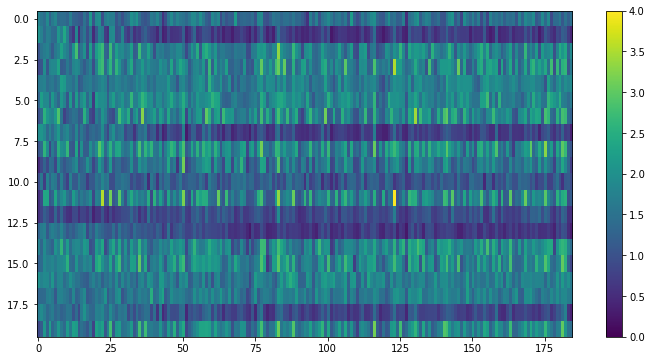

In [269]:
plt.figure( figsize = (12, 6) )
plt.imshow( burst_activities, aspect = 'auto' )
plt.colorbar()
plt.clim( 0, 4 )
plt.show()

In [327]:
burst_activity_pca = PCA( n_components = 5 )
burst_activity_pca.fit( burst_activities.T )

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 5 artists>

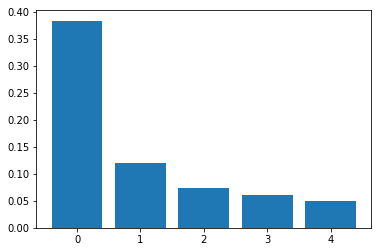

In [329]:
plt.bar( np.arange( 5 ), burst_activity_pca.explained_variance_ratio_ )

In [331]:
burst_activities_pcs = burst_activity_pca.transform( burst_activities.T )

<BarContainer object of 20 artists>

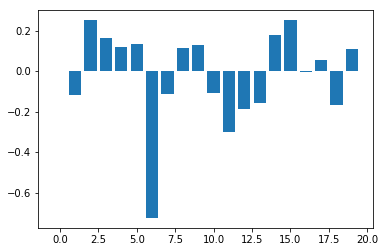

In [343]:
plt.bar( np.arange( Nz ), burst_activity_pca.components_[2, :] )

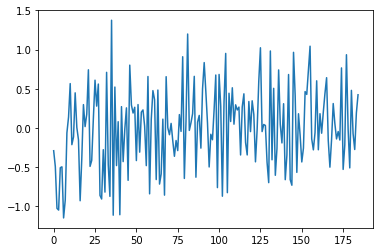

In [336]:
plt.plot( burst_activities_pcs[:, 2] )

In [344]:
burst_activity_nmf = NMF( n_components = 5 )
burst_activity_nmf.fit( burst_activities.T )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [345]:
burst_activities_nmfs = burst_activity_nmf.transform( burst_activities.T )

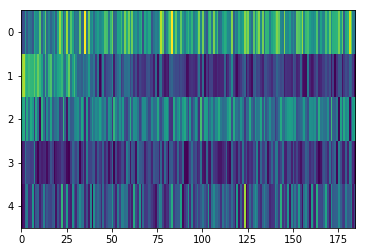

In [347]:
plt.imshow( burst_activities_nmfs.T, aspect = 'auto' )

<BarContainer object of 20 artists>

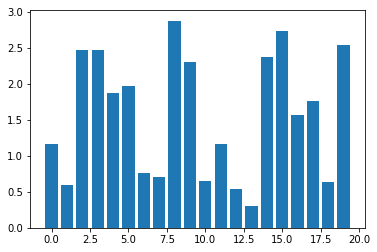

In [354]:
plt.bar( np.arange( Nz ), burst_activity_nmf.components_[0, :] )

In [355]:
import umap

In [381]:
burst_activity_reducer = umap.UMAP()

In [378]:
n_delay = 4
burst_activities_delay = np.zeros( (n_delay * burst_activities.shape[0], burst_activities.shape[1]) )
for i in range( n_delay ):
    burst_activities_delay[(i * burst_activities.shape[0]):((i+1) * burst_activities.shape[0]), i:] = burst_activities[:, :(burst_activities.shape[1]-i)]
    
burst_activities_delay = burst_activities_delay[:, n_delay:]

In [382]:
burst_activity_embedding = burst_activity_reducer.fit_transform( burst_activities_delay.T )

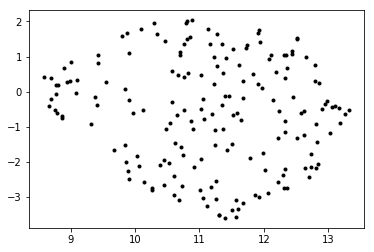

In [383]:
plt.plot( burst_activity_embedding[:, 0], burst_activity_embedding[:, 1], 'k.' )

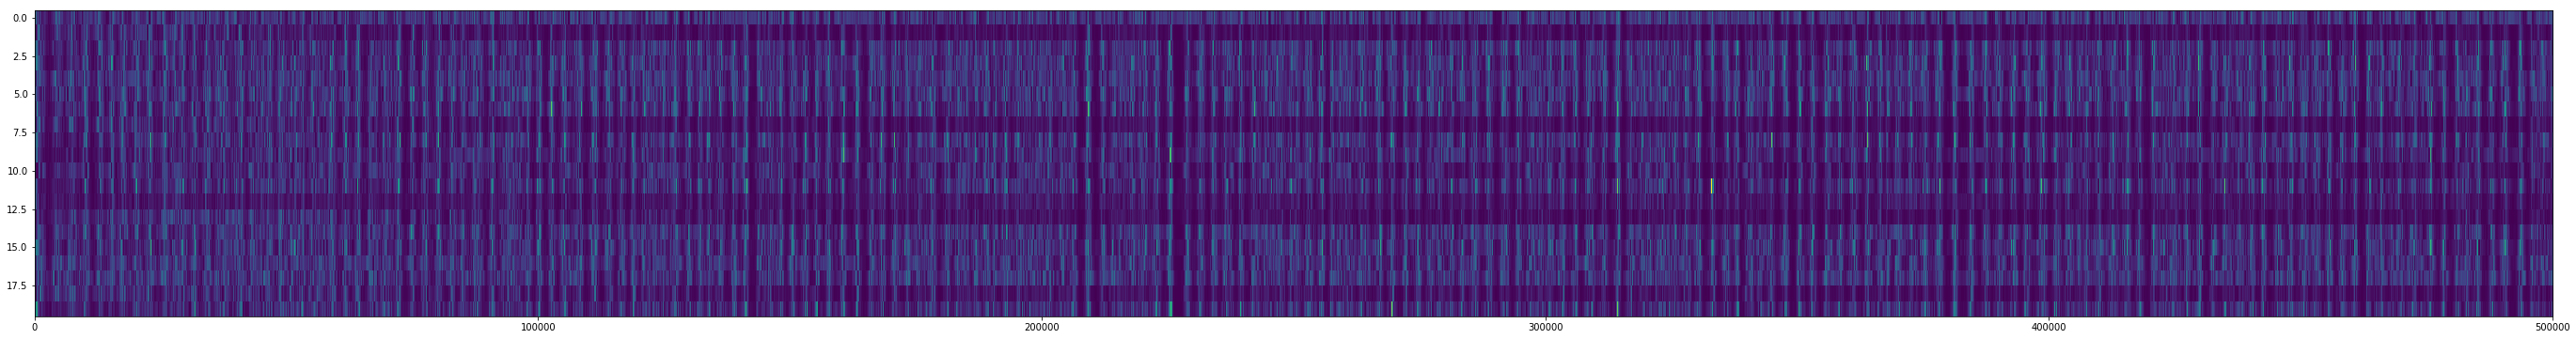

In [270]:
plt.figure( figsize = (48, 6) )
plt.imshow( cur_channels_env, aspect = 'auto' )

In [271]:
burst_corr = np.corrcoef( burst_activities )

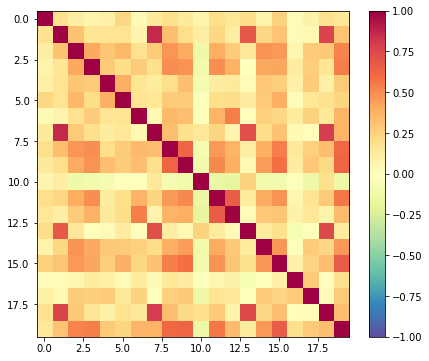

In [272]:
plt.figure( figsize = (7, 6) )
plt.imshow( burst_corr, aspect = 'auto', cmap = 'Spectral_r' )
plt.colorbar()
plt.clim( -1, 1 )
plt.show()

In [229]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
#     if isinstance(corr_array, pd.DataFrame):
#         return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx], idx

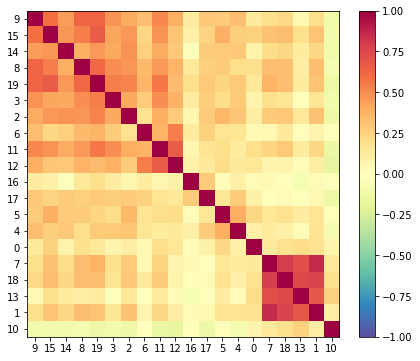

In [273]:
burst_corr_clustered, burst_corr_sort_idx = cluster_corr( burst_corr )

plt.figure( figsize = (7, 6) )
plt.imshow( burst_corr_clustered, aspect = 'auto', cmap = 'Spectral_r' )
plt.yticks( np.arange( Nz ), burst_corr_sort_idx )
plt.xticks( np.arange( Nz ), burst_corr_sort_idx )
plt.colorbar()
plt.clim( -1, 1 )
plt.show()

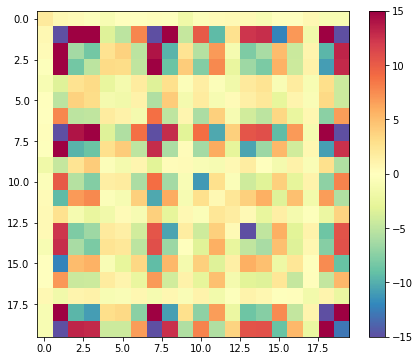

In [274]:
plt.figure( figsize = (7, 6) )
plt.imshow( np.real( W_star[:, :, 60000] + W_star[:, :, 60000].T ), aspect = 'auto', cmap = 'Spectral_r' )
plt.clim( -15, 15 )
plt.colorbar()
plt.show()

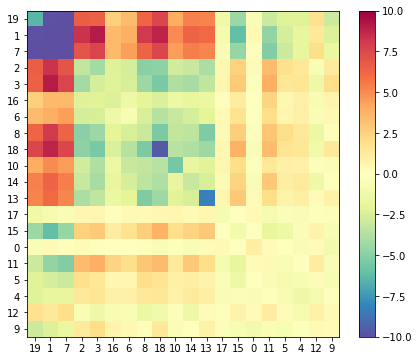

In [275]:
W_anti = np.real( 0.5 * (W_star[:, :, 60000] + W_star[:, :, 60000].T) )
W_anti_clustered, W_anti_sort_idx = cluster_corr( W_anti )

plt.figure( figsize = (7, 6) )
plt.imshow( W_anti_clustered, aspect = 'auto', cmap = 'Spectral_r' )
plt.yticks( np.arange( Nz ), W_anti_sort_idx )
plt.xticks( np.arange( Nz ), W_anti_sort_idx )
plt.colorbar()
plt.clim( -10, 10 )
plt.show()

In [287]:
peak_width_coherence = 512

peak = env_peaks[1]
peak_start = peak - (peak_width_coherence // 2)
peak_end = peak + (peak_width_coherence // 2)
test_signal_i = np.real( z_star[7, peak_start:peak_end] )
test_signal_j = np.real( z_star[18, peak_start:peak_end] )
test_f, test_Cxy = scipy.signal.coherence( test_signal_i, test_signal_j, nfft = 512 )

burst_coherences = np.zeros( (Nz, Nz, test_f.shape[0], env_peaks.shape[0] ) )

bad_peaks_early = []
bad_peaks_late = []

for i_peak, peak in enumerate( env_peaks ):
    
    if i_peak % 10 == 0 and i_peak > 0:
        print( 'Peak {0}'.format( i_peak ) )
    
    peak_start = peak - (peak_width_coherence // 2)
    peak_end = peak + (peak_width_coherence // 2)
    if peak_start < 0:
        bad_peaks_early.append( i_peak )
        continue
    if peak_end >= cur_channels_env.shape[1]:
        bad_peaks_late.append( i_peak )
        continue
    for i_channel in range( Nz ):
        for j_channel in range( Nz ):
            test_signal_i = np.real( z_star[i_channel, peak_start:peak_end] )
            test_signal_j = np.real( z_star[j_channel, peak_start:peak_end] )
            burst_coherence_f, burst_coherences[i_channel, j_channel, :, i_peak] = scipy.signal.coherence( test_signal_i, test_signal_j, nfft = 512 )


Peak 10
Peak 20
Peak 30
Peak 40
Peak 50
Peak 60
Peak 70
Peak 80
Peak 90
Peak 100
Peak 110
Peak 120
Peak 130
Peak 140
Peak 150
Peak 160
Peak 170
Peak 180


In [288]:
burst_coherences = burst_coherences[:, :, :, (bad_peaks_early[-1]+1):bad_peaks_late[0]]

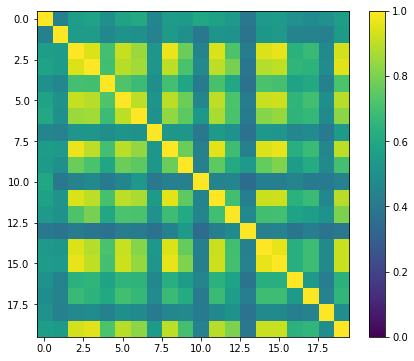

In [289]:
burst_coherence_mean_f = np.mean( burst_coherences[:, :, (burst_coherence_f >= 0.1) & (burst_coherence_f <= 0.2), :], axis = 2 )
burst_coherence_mean_trials = np.mean( burst_coherence_mean_f, axis = 2 )

plt.figure( figsize = (7, 6) )
plt.imshow( burst_coherence_mean_trials, aspect = 'auto' )
plt.colorbar()
plt.clim( 0, 1 )
plt.show()

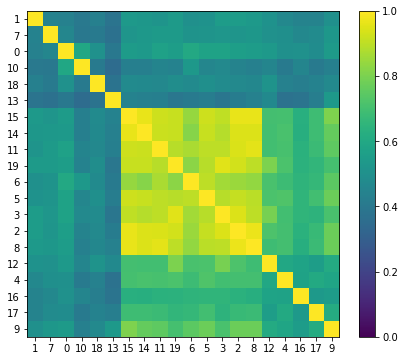

In [290]:
burst_coherence_mean_trials_clustered, burst_coherence_mean_trials_sort_idx = cluster_corr( burst_coherence_mean_trials )

plt.figure( figsize = (7, 6) )
plt.imshow( burst_coherence_mean_trials_clustered, aspect = 'auto' )
plt.yticks( np.arange( Nz ), burst_coherence_mean_trials_sort_idx )
plt.xticks( np.arange( Nz ), burst_coherence_mean_trials_sort_idx )
plt.colorbar()
plt.clim( 0, 1 )
plt.show()

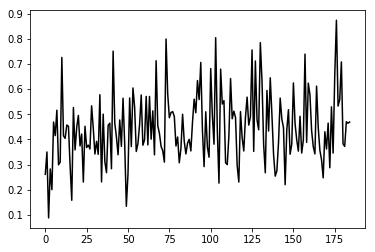

In [299]:
plt.plot( burst_coherence_mean_f[1, 7, :], 'k-' )

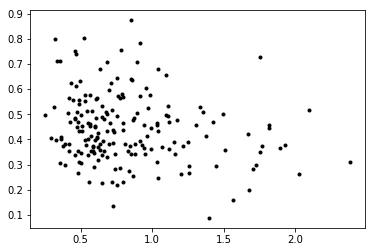

In [300]:
plt.plot( burst_activities[1, :], burst_coherence_mean_f[1, 7, :], 'k.' )

In [301]:
env_peaks_neg, tmp = scipy.signal.find_peaks( -mean_env, threshold = 0.0001, distance = 2000 )

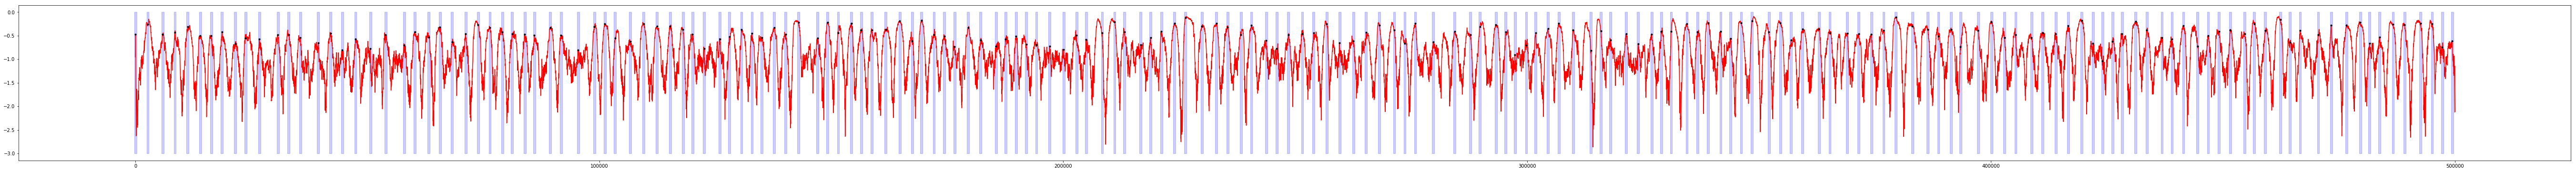

In [304]:
plt.figure( figsize = (96, 6) )
plt.plot( -mean_env, 'r-' )
plt.plot( env_peaks_neg, -mean_env[env_peaks_neg], 'k.' )

peak_width = 500
for peak in env_peaks_neg:
    plt.fill_between( np.array( [peak - (peak_width // 2), peak + (peak_width // 2)] ), -3.,
                      color = 'b',
                      alpha = 0.2 )

# plt.xlim( 100000, 150000 )
plt.show()

In [305]:
peak_width_coherence = 512

peak = env_peaks_neg[1]
peak_start = peak - (peak_width_coherence // 2)
peak_end = peak + (peak_width_coherence // 2)
test_signal_i = np.real( z_star[7, peak_start:peak_end] )
test_signal_j = np.real( z_star[18, peak_start:peak_end] )
test_f, test_Cxy = scipy.signal.coherence( test_signal_i, test_signal_j, nfft = 512 )

trough_coherences = np.zeros( (Nz, Nz, test_f.shape[0], env_peaks_neg.shape[0] ) )

bad_peaks_early = []
bad_peaks_late = []

for i_peak, peak in enumerate( env_peaks_neg ):
    
    if i_peak % 10 == 0 and i_peak > 0:
        print( 'Peak {0}'.format( i_peak ) )
    
    peak_start = peak - (peak_width_coherence // 2)
    peak_end = peak + (peak_width_coherence // 2)
    if peak_start < 0:
        bad_peaks_early.append( i_peak )
        continue
    if peak_end >= cur_channels_env.shape[1]:
        bad_peaks_late.append( i_peak )
        continue
    for i_channel in range( Nz ):
        for j_channel in range( Nz ):
            test_signal_i = np.real( z_star[i_channel, peak_start:peak_end] )
            test_signal_j = np.real( z_star[j_channel, peak_start:peak_end] )
            trough_coherence_f, trough_coherences[i_channel, j_channel, :, i_peak] = scipy.signal.coherence( test_signal_i, test_signal_j, nfft = 512 )

print( 'Done.' )

Peak 10
Peak 20
Peak 30
Peak 40
Peak 50
Peak 60
Peak 70
Peak 80
Peak 90
Peak 100
Peak 110
Peak 120
Peak 130
Peak 140
Peak 150
Peak 160
Peak 170
Peak 180
Done.


In [309]:
# trough_coherences = trough_coherences[:, :, :, (bad_peaks_early[-1]+1):bad_peaks_late[0]]
trough_coherences = trough_coherences[:, :, :, (bad_peaks_early[-1]+1):]

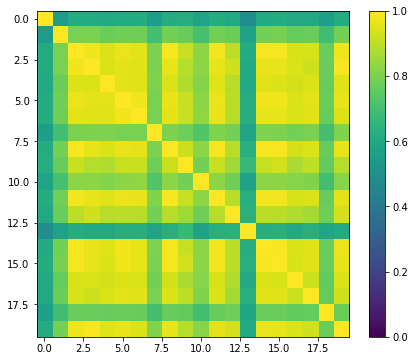

In [310]:
trough_coherence_mean_f = np.mean( trough_coherences[:, :, (trough_coherence_f >= 0.1) & (trough_coherence_f <= 0.2), :], axis = 2 )
trough_coherence_mean_trials = np.mean( trough_coherence_mean_f, axis = 2 )

plt.figure( figsize = (7, 6) )
plt.imshow( trough_coherence_mean_trials, aspect = 'auto' )
plt.colorbar()
plt.clim( 0, 1 )
plt.show()

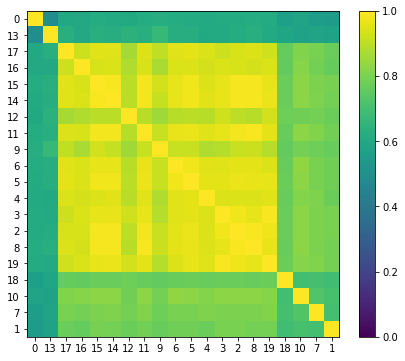

In [385]:
trough_coherence_mean_trials_clustered, trough_coherence_mean_trials_sort_idx = cluster_corr( trough_coherence_mean_trials )

plt.figure( figsize = (7, 6) )
plt.imshow( trough_coherence_mean_trials_clustered, aspect = 'auto' )
plt.yticks( np.arange( Nz ), trough_coherence_mean_trials_sort_idx )
plt.xticks( np.arange( Nz ), trough_coherence_mean_trials_sort_idx )
plt.colorbar()
plt.clim( 0, 1 )
plt.show()

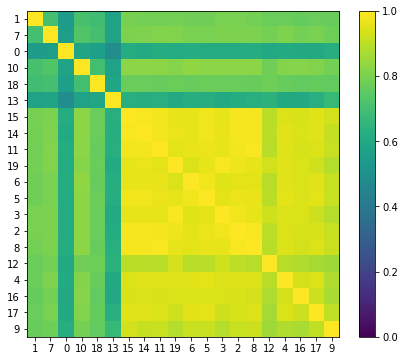

In [386]:
plt.figure( figsize = (7, 6) )
plt.imshow( trough_coherence_mean_trials[burst_coherence_mean_trials_sort_idx, :][:, burst_coherence_mean_trials_sort_idx], aspect = 'auto' )
plt.yticks( np.arange( Nz ), burst_coherence_mean_trials_sort_idx )
plt.xticks( np.arange( Nz ), burst_coherence_mean_trials_sort_idx )
plt.colorbar()
plt.clim( 0, 1 )
plt.show()

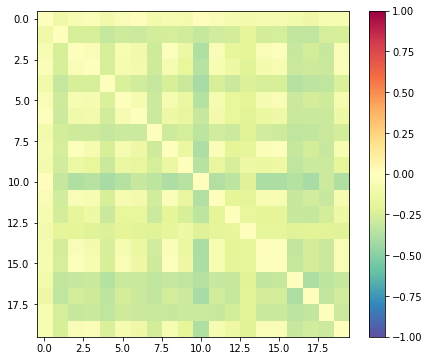

In [312]:
plt.figure( figsize = (7, 6) )
plt.imshow( burst_coherence_mean_trials - trough_coherence_mean_trials, aspect = 'auto', cmap = 'Spectral_r' )
plt.colorbar()
plt.clim( -1, 1 )
plt.show()

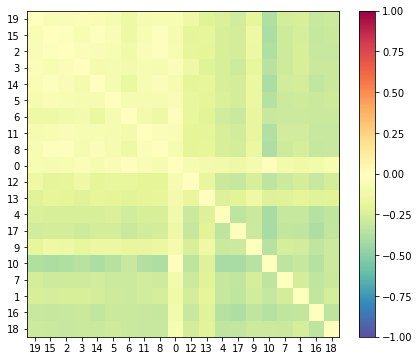

In [315]:
delta_coherence_mean_trials = burst_coherence_mean_trials - trough_coherence_mean_trials
delta_coherence_mean_trials_clustered, delta_coherence_mean_trials_sort_idx = cluster_corr( burst_coherence_mean_trials - trough_coherence_mean_trials )

plt.figure( figsize = (7, 6) )
plt.imshow( delta_coherence_mean_trials_clustered, aspect = 'auto', cmap = 'Spectral_r' )
plt.yticks( np.arange( Nz ), delta_coherence_mean_trials_sort_idx )
plt.xticks( np.arange( Nz ), delta_coherence_mean_trials_sort_idx )
plt.colorbar()
plt.clim( -1, 1 )
plt.show()

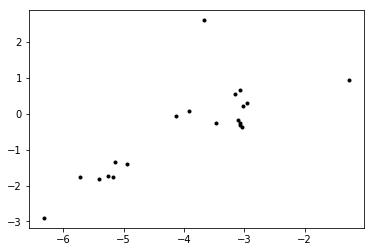

In [318]:
plt.plot( np.sum( delta_coherence_mean_trials, axis = 1 ), np.imag( b ), 'k.' )

In [323]:
r = np.sqrt( - np.divide( l, np.real( b ) ) )
r[np.isnan( r )] = 0.

omega = 1 + np.multiply( np.imag( b ), np.power( r, 2 ) )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


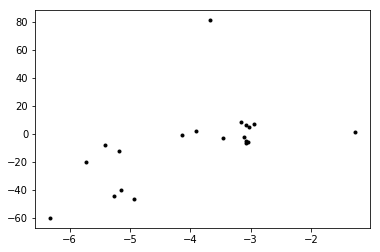

In [325]:
plt.plot( np.sum( delta_coherence_mean_trials, axis = 1 ), np., 'k.' )